In [1]:
from IPython.display import display
import mglearn

In [2]:
# pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [3]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), 
    header=None, index_col=False, 
    names=["age", "workclass", "fnlwgt", "education", "education-num", 
           "marital-status", "occupation", "relationship", "race", "gender", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
data.shape

(32561, 7)

In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print("original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("features after get_dummies:\n", list(data_dummies.columns), "\n")

original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
data_dummies.shape

(32561, 46)

In [9]:
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]

X = features.values
y = data_dummies["income_ >50K"].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test score: {:.2f}".format(logreg.score(X_test, y_test)))

test score: 0.81


In [11]:
demo_df = pd.DataFrame({"numerical_feature": [0, 1, 2, 1], 
                        "categorical_feature": ["socks", "fox", "socks", "box"]})
demo_df

,categorical_feature,numerical_feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [12]:
pd.get_dummies(demo_df)

,numerical_feature,categorical_feature_box,categorical_feature_fox,categorical_feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [13]:
demo_df["numerical_feature"] = demo_df["numerical_feature"].astype(str)
pd.get_dummies(demo_df, columns=["numerical_feature", "categorical_feature"])

,numerical_feature_0,numerical_feature_1,numerical_feature_2,categorical_feature_box,categorical_feature_fox,categorical_feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


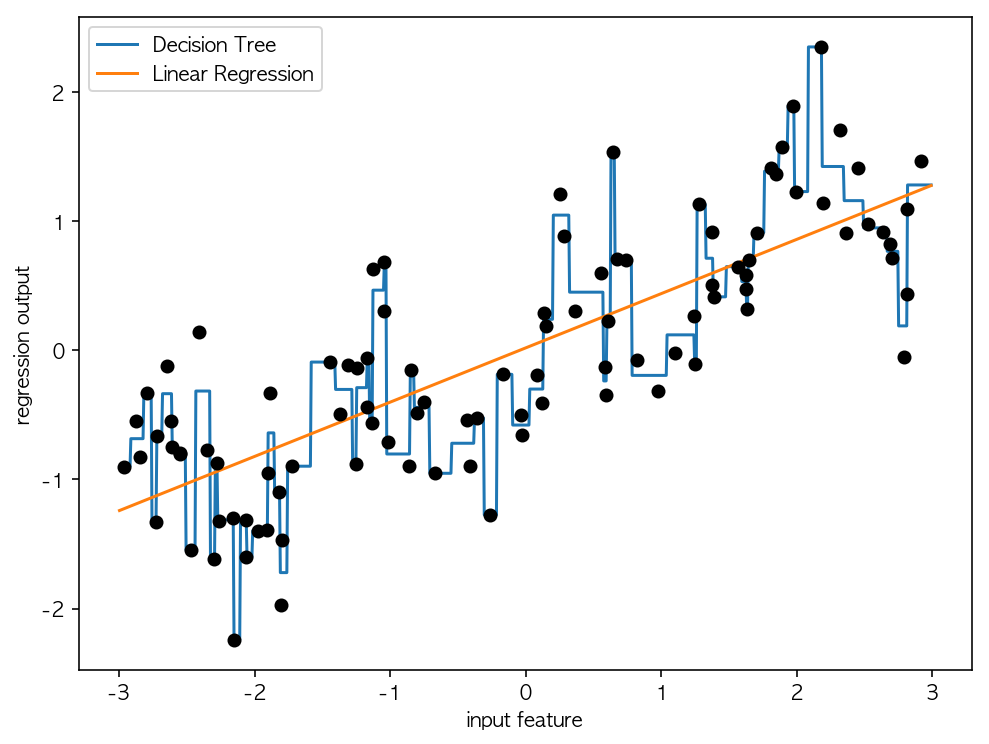

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

plt.figure(figsize=(8, 6))
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")
plt.show()

In [15]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [16]:
which_bin = np.digitize(X, bins=bins)
print("\ndata point:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


data point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [18]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


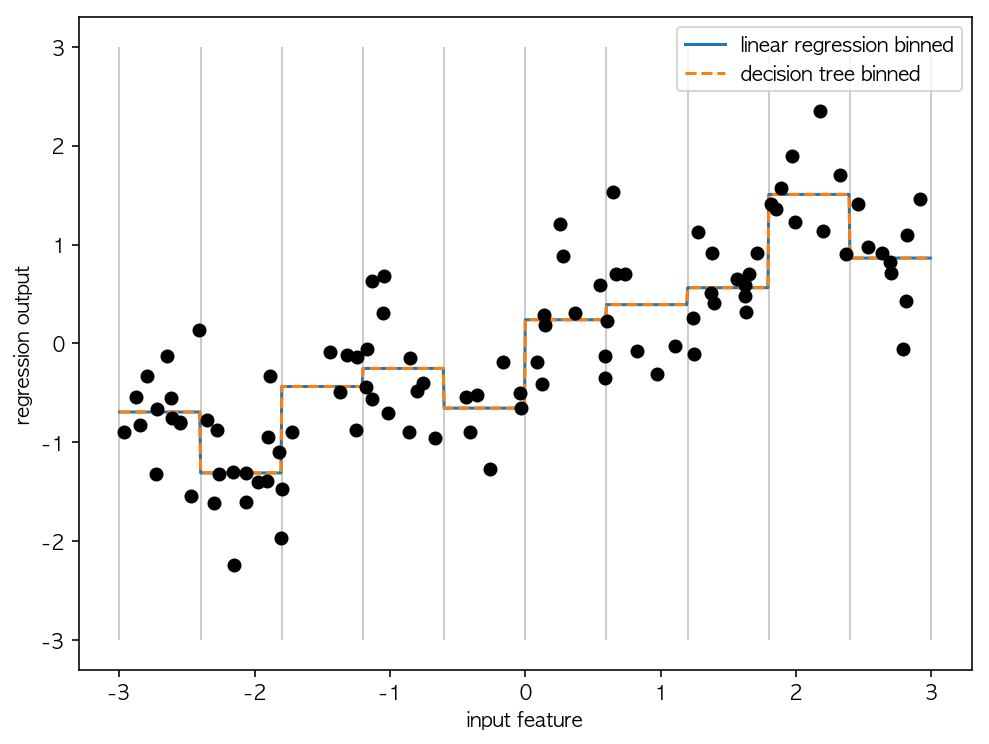

In [19]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(8, 6))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label="decision tree binned")
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.show()

In [20]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


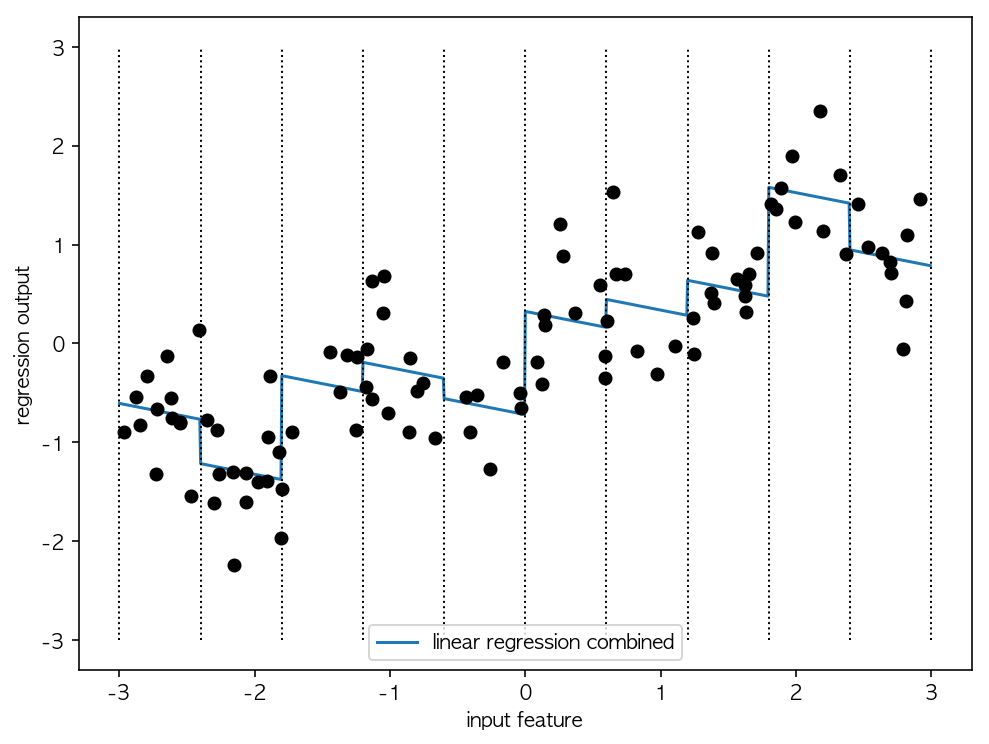

In [21]:
plt.figure(figsize=(8, 6))

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="linear regression combined")

for bin_ in bins:
    plt.plot([bin_, bin_], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [22]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


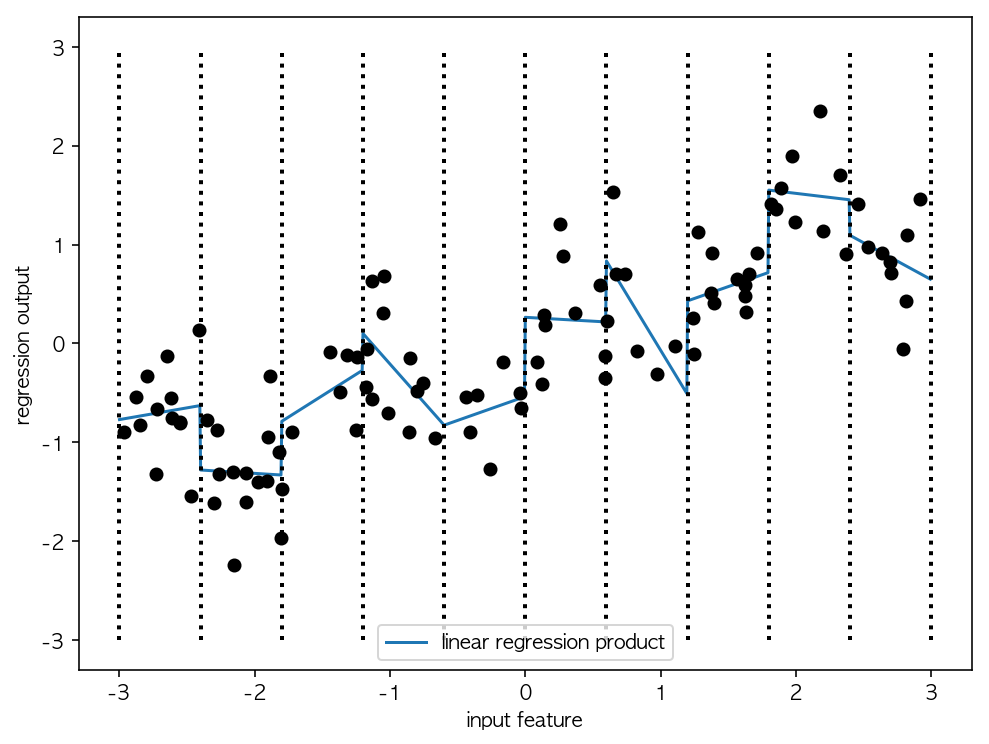

In [23]:
reg = LinearRegression().fit(X_product, y)

plt.figure(figsize=(8, 6))
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

for bin_ in bins:
    plt.plot([bin_, bin_], [-3, 3], ':', c='k', linewidth=2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [25]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [26]:
print("entries of X:\n{}".format(X[:5]))
print("entries of X_poly:\n{}".format(X_poly[:5]))

entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
entries of X_poly:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [27]:
print("polynomial feature names:\n{}".format(poly.get_feature_names()))

polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


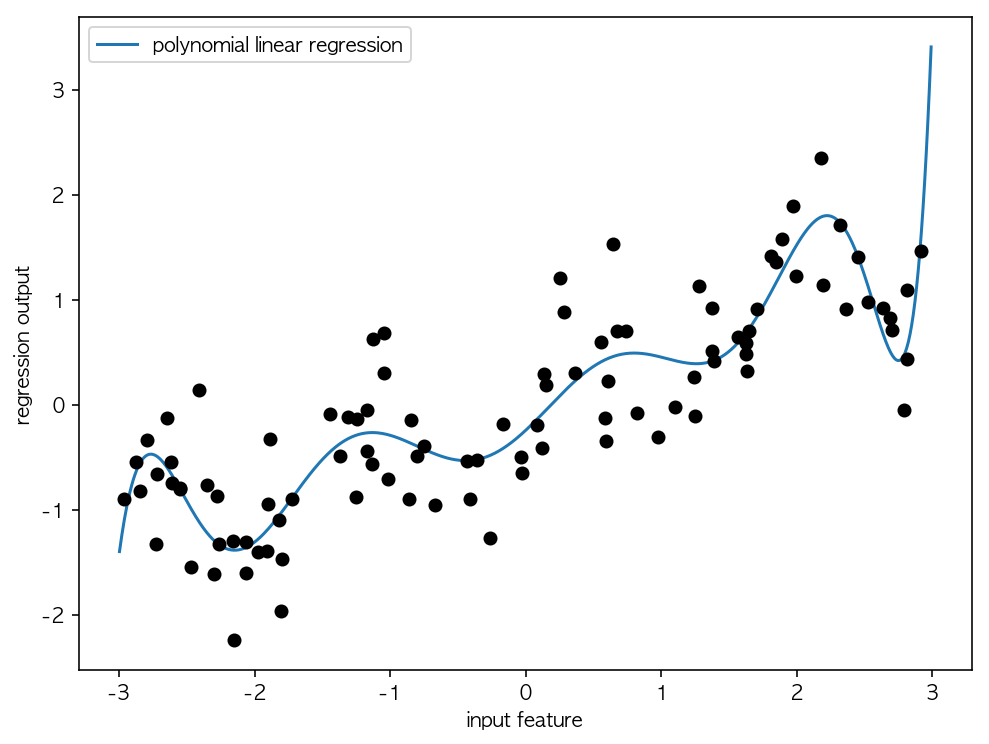

In [28]:
plt.figure(figsize=(8, 6))
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="polynomial linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")
plt.show()

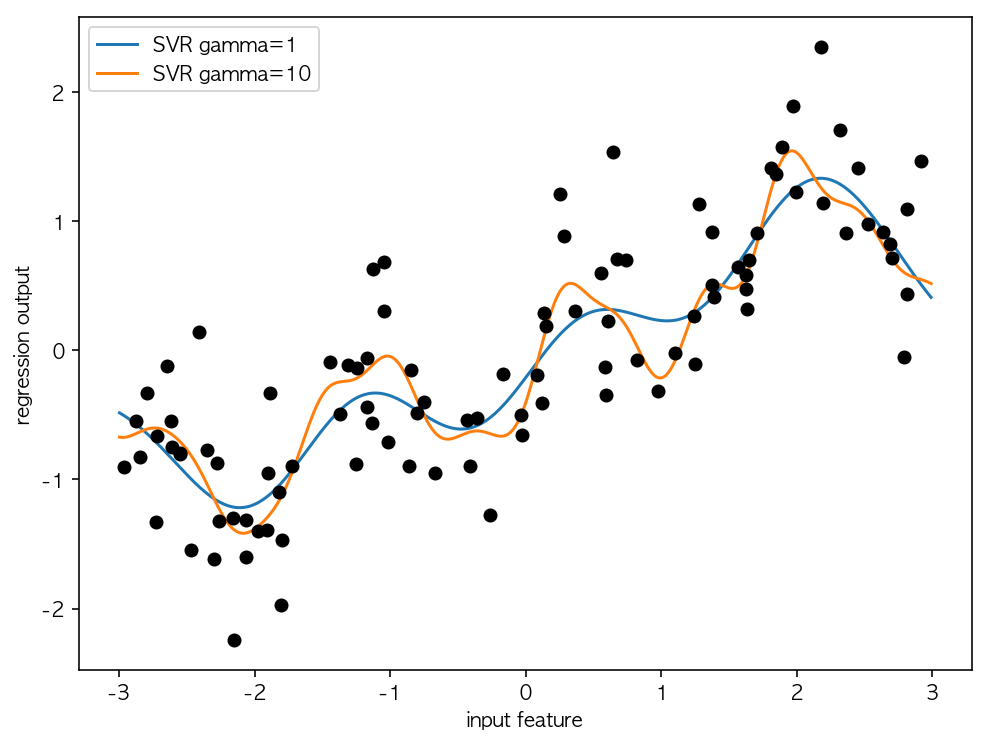

In [29]:
from sklearn.svm import SVR

plt.figure(figsize=(8, 6))
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")
plt.show()

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [32]:
print("polynomial feature names:\n{}".format(poly.get_feature_names()))

polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("score without interaction: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("score with interaction: {:.3f}".format(ridge.score(X_test_poly, y_test)))

score without interaction: 0.577
score with interaction: 0.741


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("score without interaction: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("Score with interaction: {:.3f}".format(rf.score(X_test_poly, y_test)))

score without interaction: 0.785
Score with interaction: 0.760


In [35]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [36]:
print("feature counts:\n{}".format(np.bincount(X[:, 0])))

feature counts:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'값')

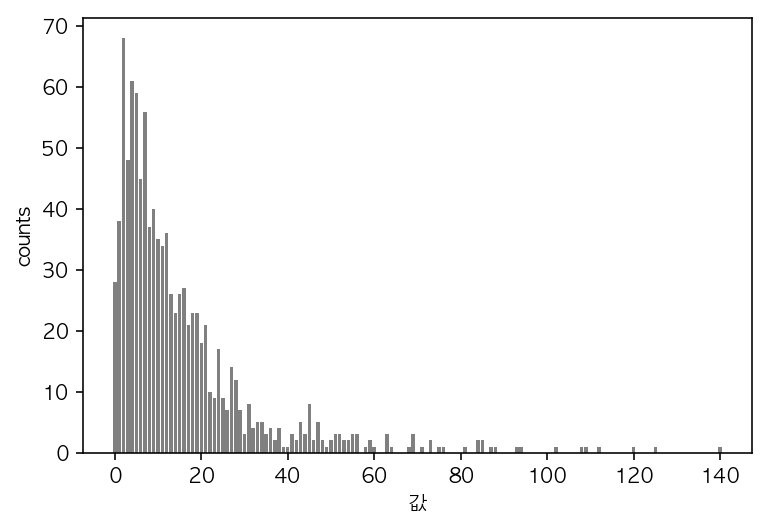

In [37]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("counts")
plt.xlabel("값")

In [38]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("test score: {:.3f}".format(score))

test score: 0.622


In [39]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

Text(0.5,0,'values')

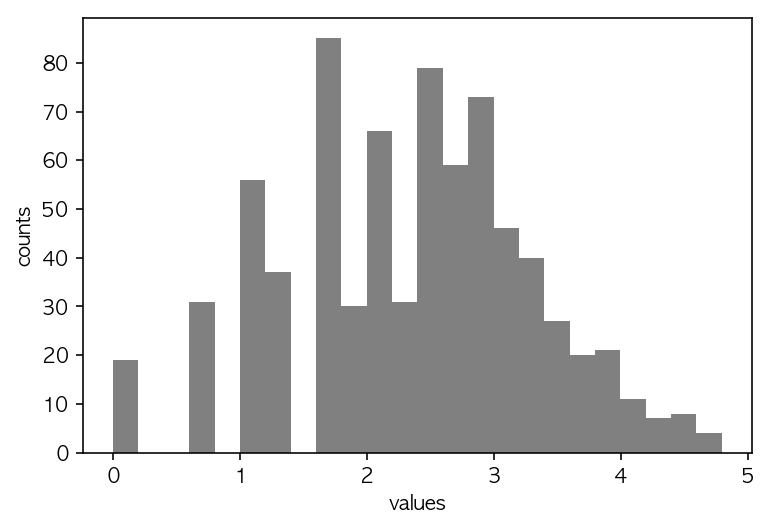

In [40]:
plt.hist(X_train_log[:, 0], bins=24, color='grey')
plt.ylabel("counts")
plt.xlabel("values")

In [41]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("test score: {:.3f}".format(score))

test score: 0.875


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected_shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected_shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

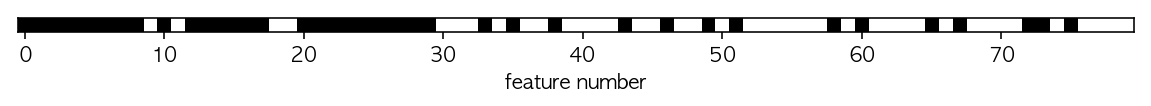

In [43]:
mask = select.get_support()
print(mask)
plt.figure(figsize=(10, 2))
plt.imshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("feature number")
plt.yticks(())

In [44]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

score with all features: 0.930
Score with selected features: 0.940


In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(
    n_estimators=100, random_state=42), threshold="median")

In [46]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

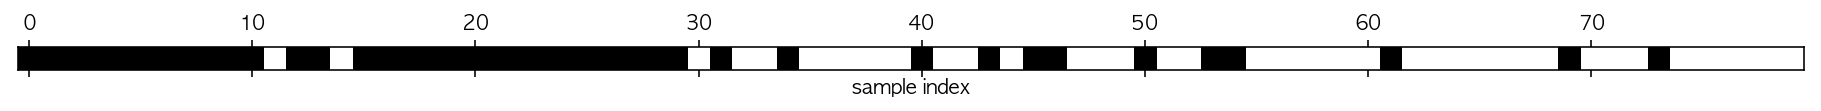

In [47]:
mask = select.get_support()
plt.figure(figsize=(10, 2))
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("sample index")
plt.yticks(())

In [48]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("test score: {:.3f}".format(score))

test score: 0.951


([], <a list of 0 Text yticklabel objects>)

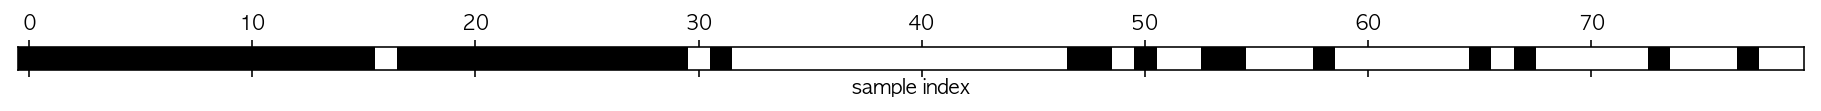

In [49]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.figure(figsize=(10, 2))
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("sample index")
plt.yticks(())

In [50]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("test score: {:.3f}".format(score))

test score: 0.951


In [51]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64

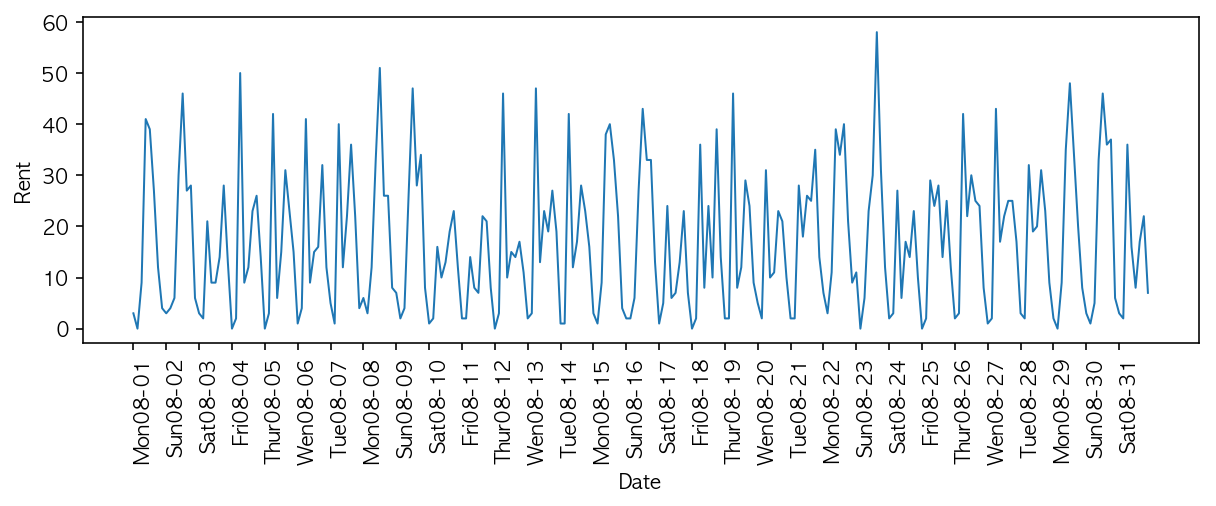

In [52]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["Sun", "Sat", "Fri", "Thur", "Wen", "Tue", "Mon"]
xtick_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                             xticks.strftime("%m-%d"))]
plt.xticks(xticks, xtick_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rent")
plt.show()

In [55]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10*9

In [61]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("test score R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(12,5))
    
    plt.xticks(range(0, len(X), 8), xtick_name, rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="train prediction")
    
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="test prediction")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rent Counts")

test score R^2: -0.04


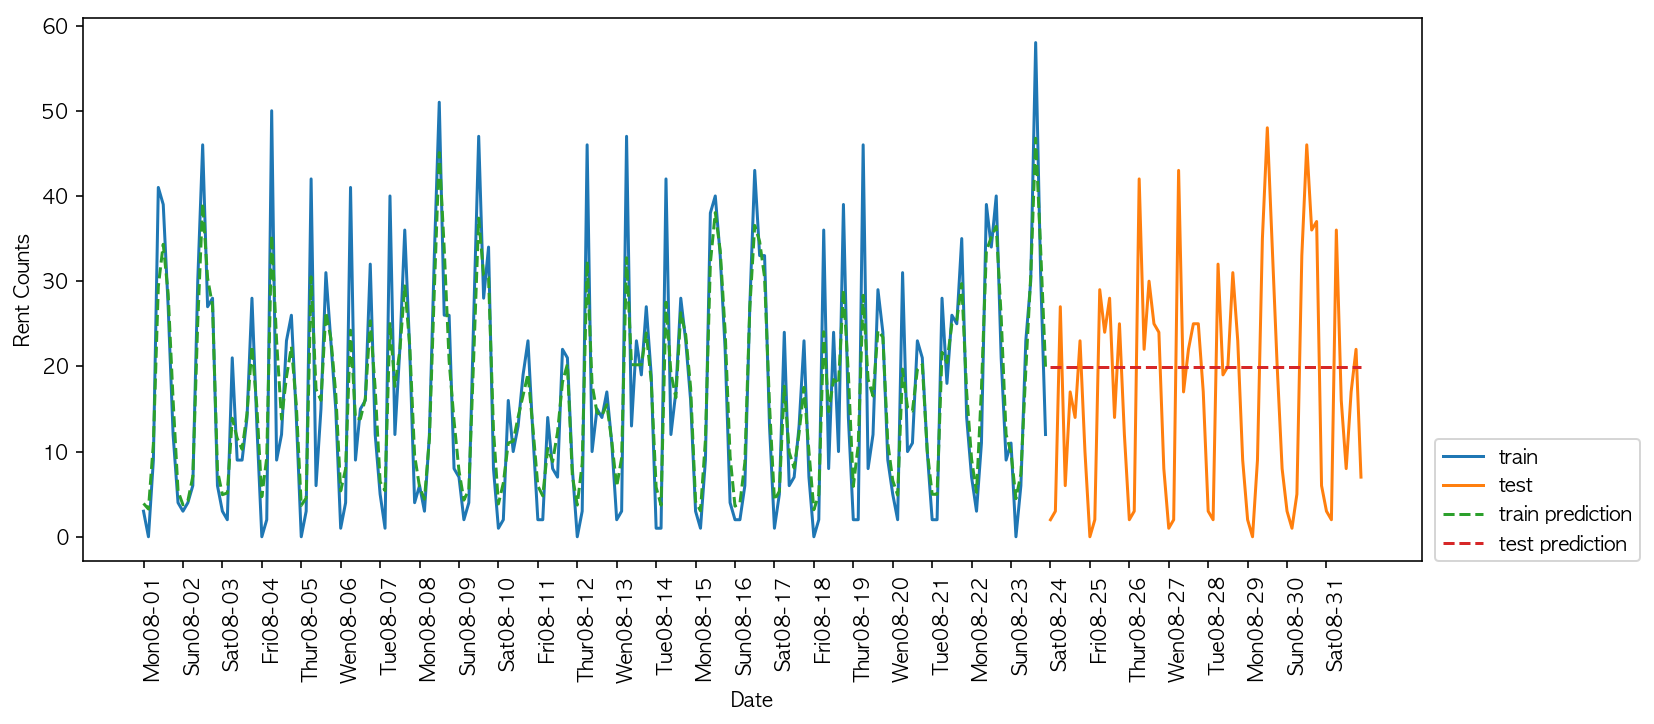

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

test score R^2: 0.60


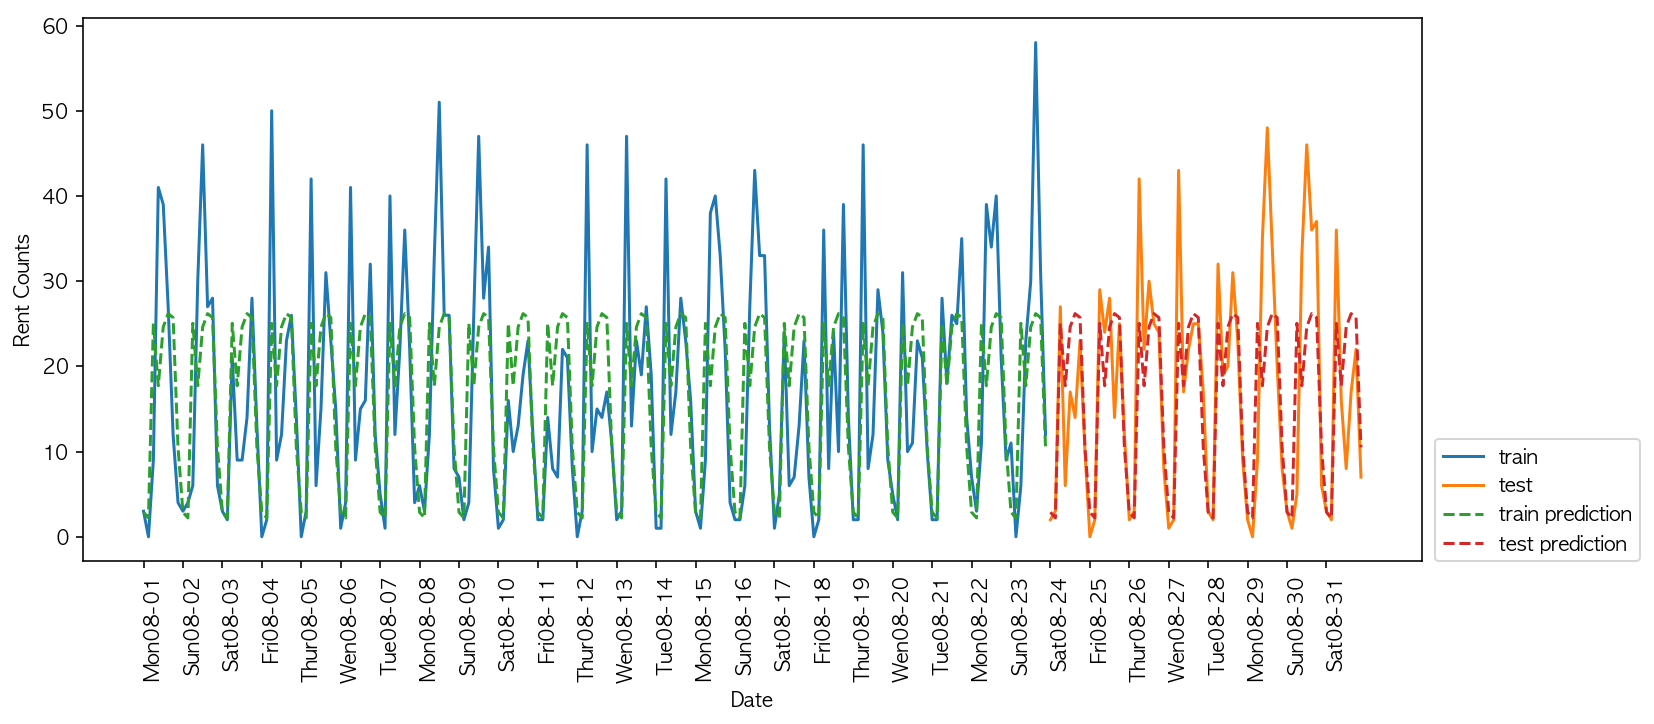

In [63]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

test score R^2: 0.84


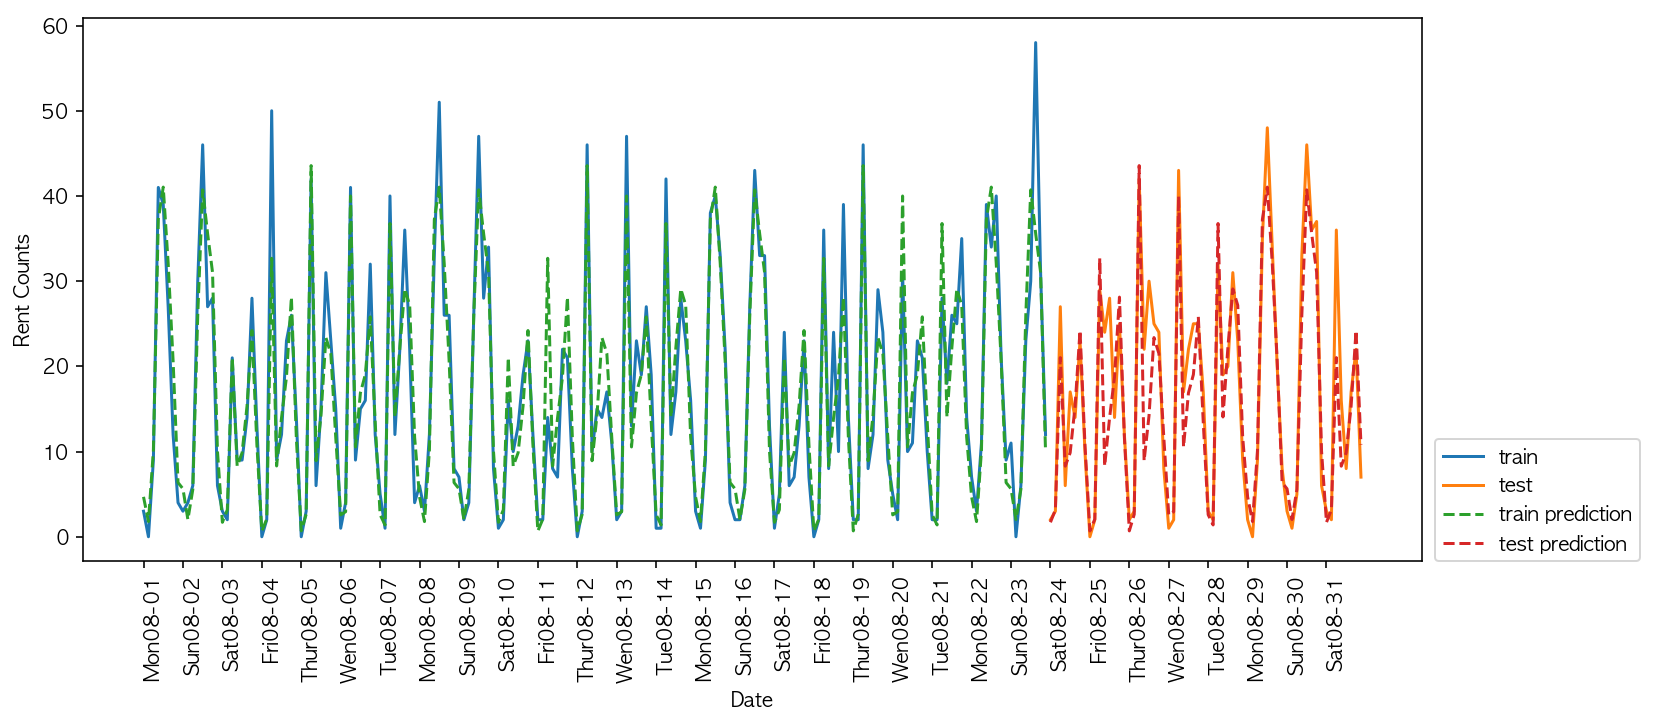

In [64]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), 
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

test score R^2: 0.13


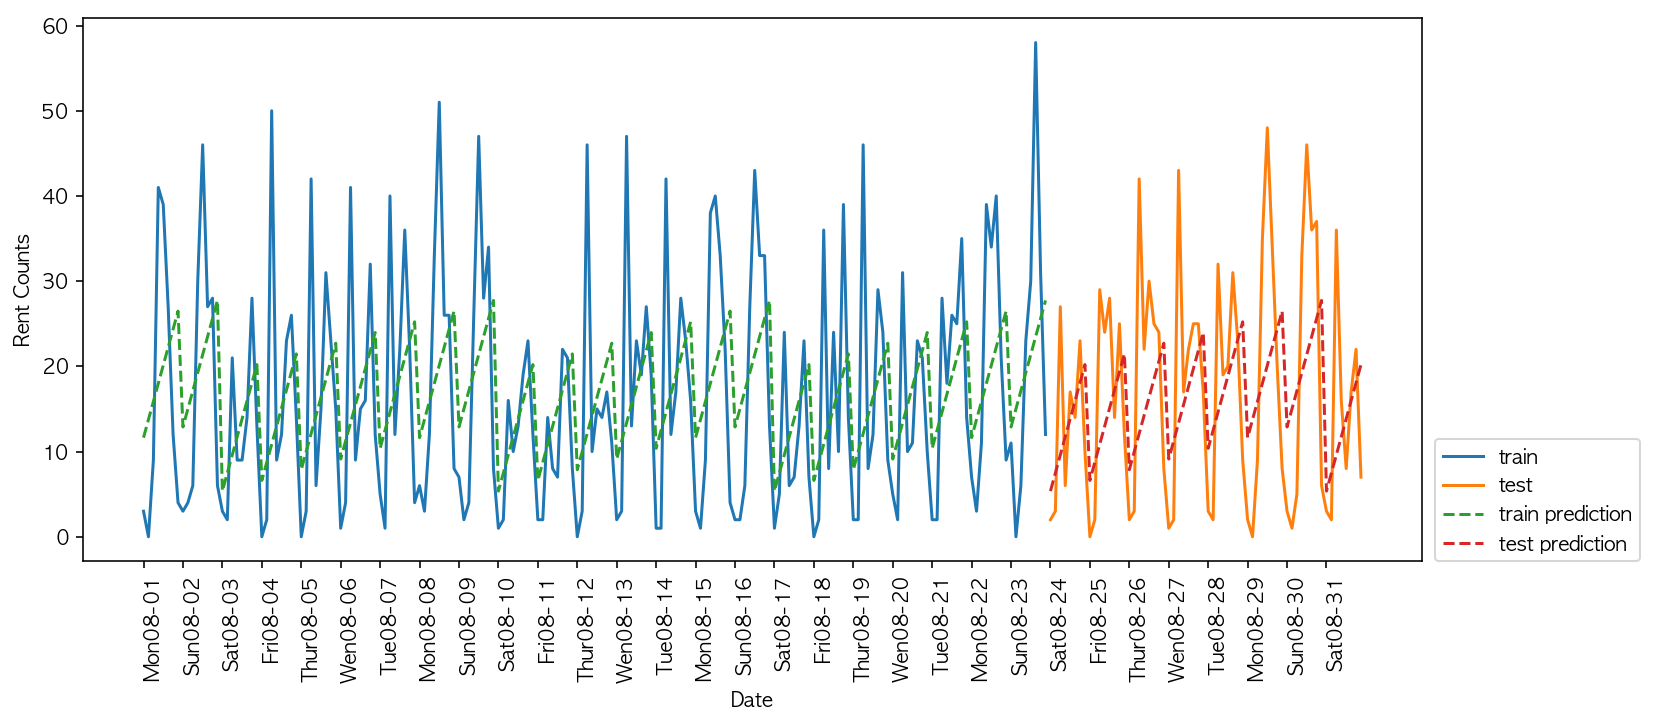

In [65]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [66]:
ohe = OneHotEncoder()
X_hour_week_onehot = ohe.fit_transform(X_hour_week).toarray()

test score R^2: 0.62


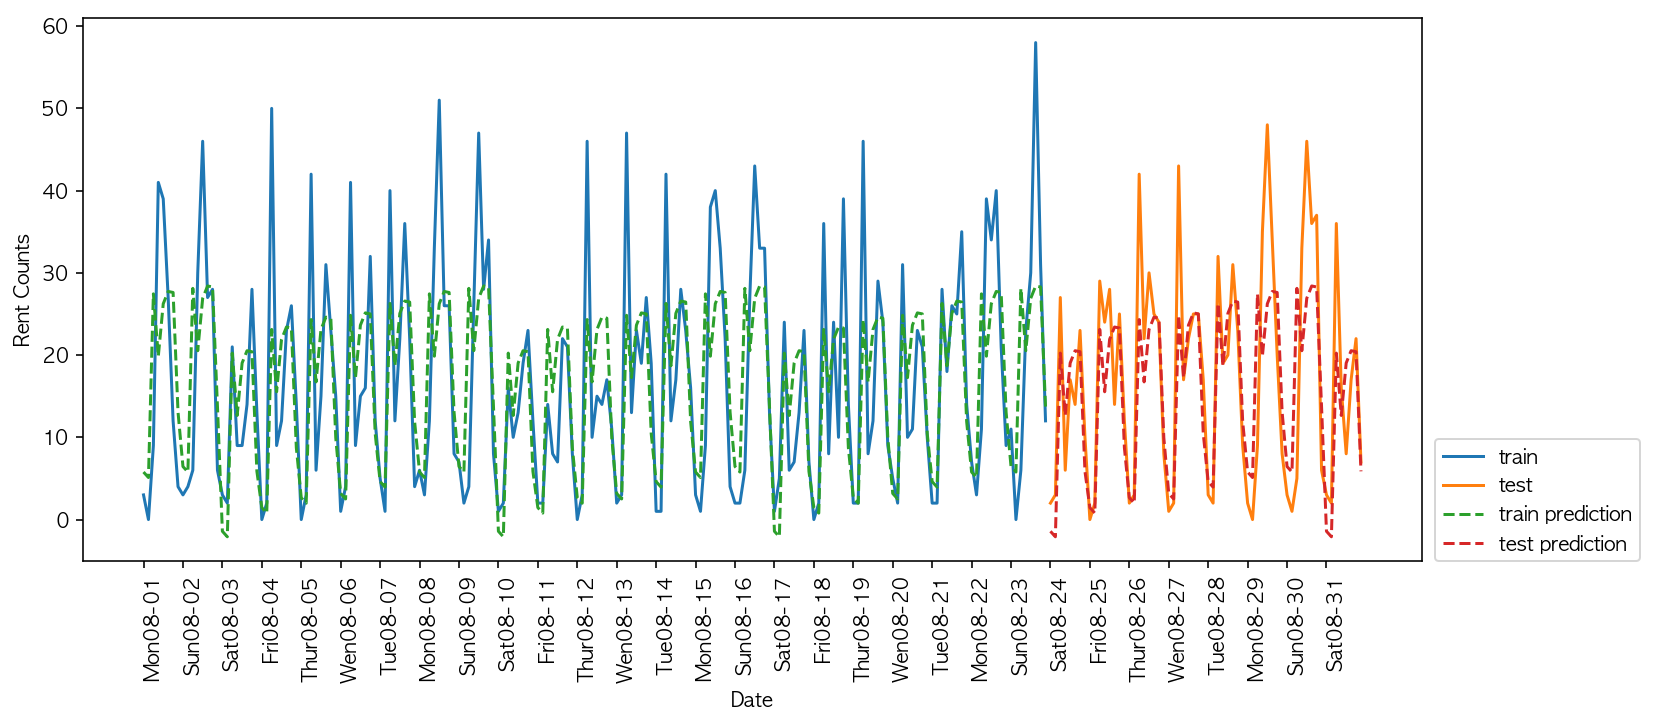

In [67]:
eval_on_features(X_hour_week_onehot, y, Ridge())

test score R^2: 0.85


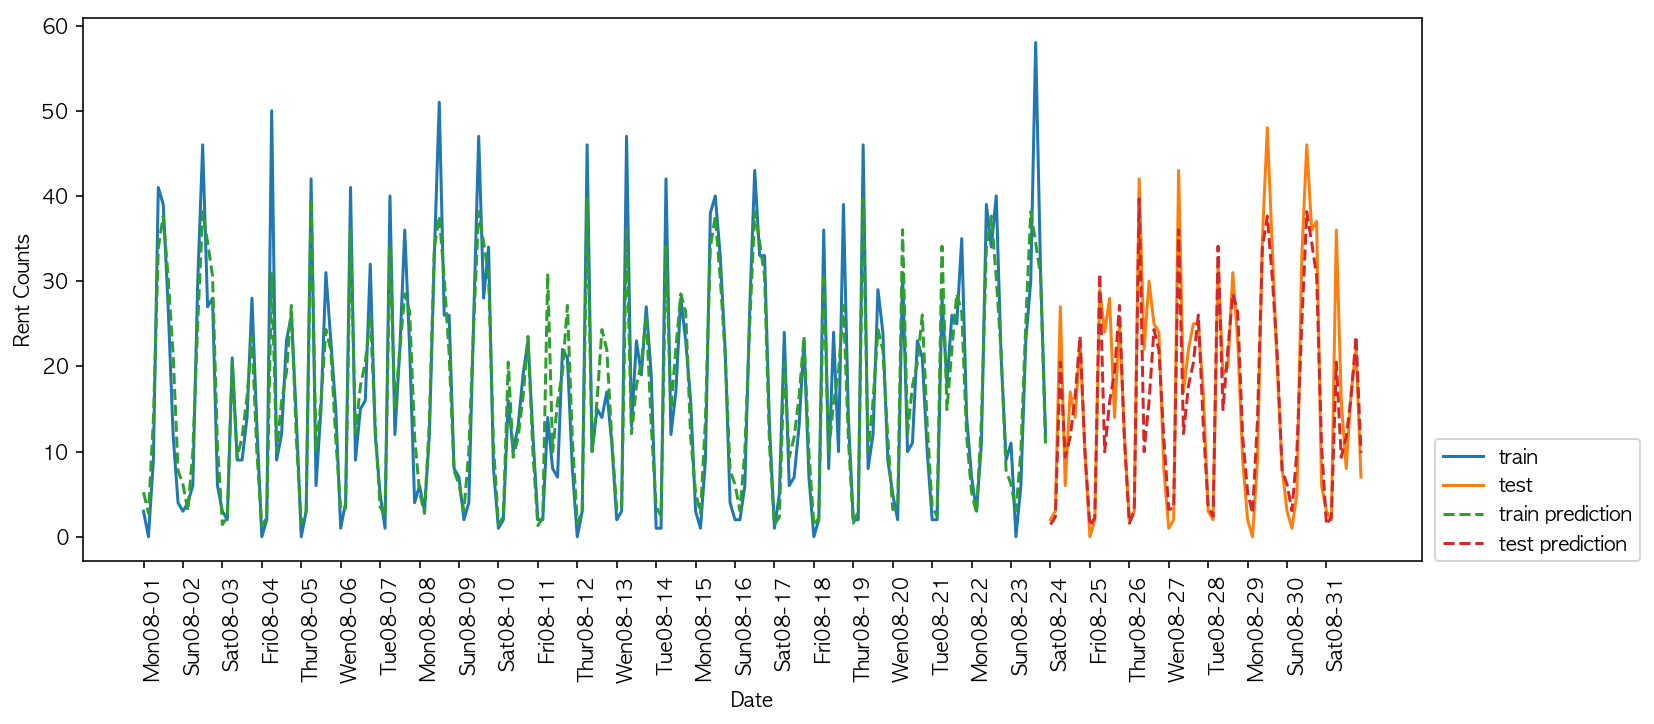

In [68]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, 
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [69]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Sun", "Sat", "Fri", "Thur", "Wen", "Tue", "Mon"][::-1]
features = day + hour

In [70]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'coef')

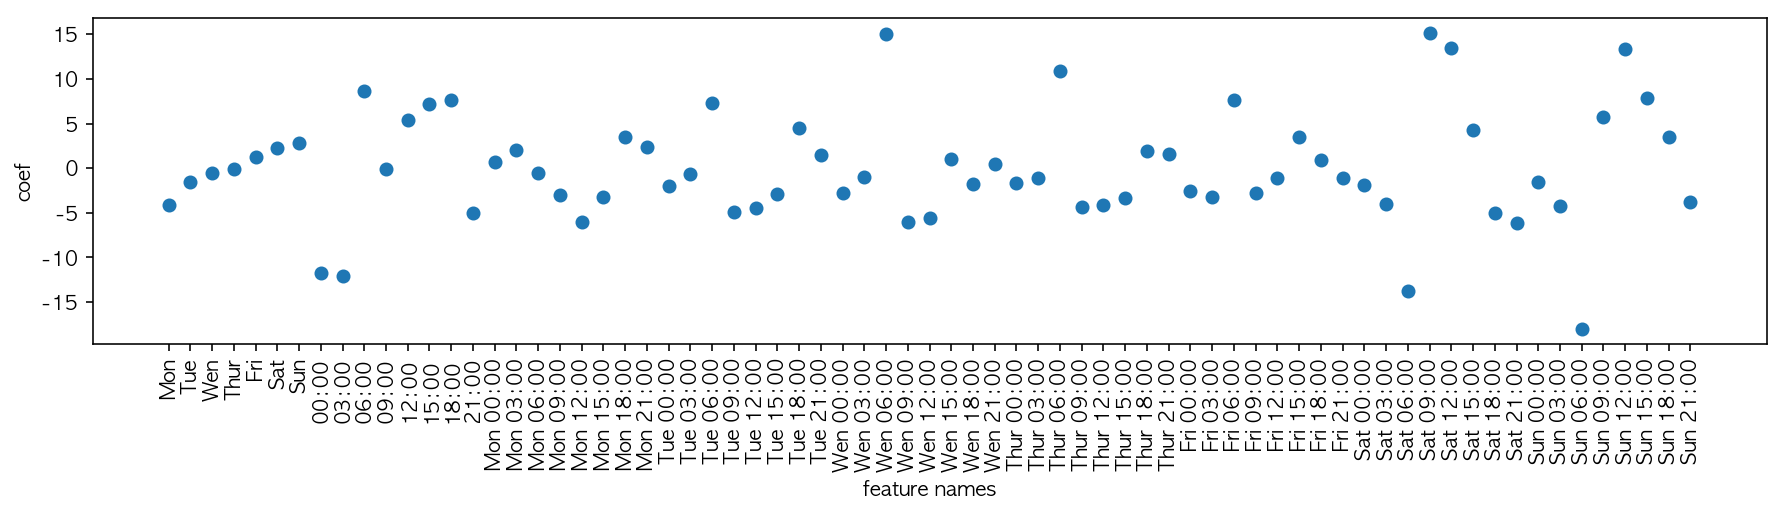

In [71]:
plt.figure(figsize=(15, 3))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("feature names")
plt.ylabel("coef")